# THE SPARK FOUNDATION

# K- Means Clustering

TASK : Prediction Using Unsupervised ML

### Author: Shubhankar Gayal. 2020

In [1]:
####importing all the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Shiv\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Unsupervised Machine Learning Method

#### We are using the Iris Dataset For the Unsupervised ML problem , So loading the data set , but the dataset already has the target value so we're removing the target to create dataset and using it as Unsupervised Dataset

In [2]:
##DATA OVERVIEW 
data = pd.read_csv("Iris.csv")
print(data['Species'].unique())
data.head()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.drop(['Species','Id'],axis = 1 , inplace=True)
data.head() ###Using this data Set for Unsupervised Technique

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Using the Kmeans Clustering

### We are using the Kmeans Clustering Algorithm and Elbow method to find out the Actual numbers of the cluster we can use to Prediction of the 

In [5]:
k = data.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(k)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'The Elbow Method')

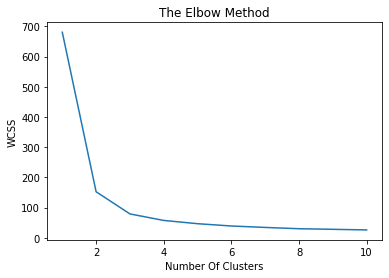

In [6]:
plt.plot(range(1,11),wcss)
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")

# THE NUMBER OF CLUSTERS 

###### After Seeing the Diagram we can say that at 3 elbow is strated to forming so the number of cluster will be 3. 

In [7]:
kmeans =  KMeans(n_clusters = 3 ,init = "k-means++",
                 max_iter=300 , n_init = 10 ,random_state = 0)
km = kmeans.fit_predict(k)

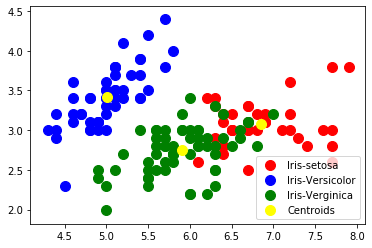

In [8]:
plt.scatter(k[km == 0,0] , k[km == 0,1],
        s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(k[km == 1,0] , k[km == 1,1],
        s = 100, c = 'blue', label = 'Iris-Versicolor')
plt.scatter(k[km == 2,0] , k[km == 2,1],
        s = 100, c = 'green', label = 'Iris-Verginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# THIS is the Final result